In [2]:
!pip install openai==0.25.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 78.7 MB/s eta 0:00:00
  Created wheel for openai: filename=openai-0.25.0-py3-none-any.whl size=55857 sha256=8ae82bc59cec5c84e012354bb8a12f80a2a473ebabbc9220d6d7b1cd8e7eb31a
  Stored in directory: /root/.cache/pip/wheels/80/5f/5e/43a5c7e951736aa9c66faafc0d493b2e3f7467cfbd399db109
Successfully built openai
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages th

In [4]:
import os
os.environ["OPENAI_API_KEY"] = ''

In [81]:
!openai tools fine_tunes.prepare_data -f QnA_dataset.jsonl

Analyzing...

- Your file contains 1035 prompt-completion pairs
- All prompts end with suffix `?\nA:`
- All prompts start with prefix `
[context:`
- All completions end with suffix `.\n`

No remediations found.

You can use your file for fine-tuning:
> openai api fine_tunes.create -t "QnA_dataset.jsonl"

After you’ve fine-tuned a model, remember that your prompt has to end with the indicator string `?\nA:` for the model to start generating completions, rather than continuing with the prompt. Make sure to include `stop=[".\n"]` so that the generated texts ends at the expected place.
Once your model starts training, it'll approximately take 16.66 minutes to train a `curie` model, and less for `ada` and `babbage`. Queue will approximately take half an hour per job ahead of you.


In [82]:
!openai tools fine_tunes.prepare_data -f validation_dataset.jsonl

Analyzing...

- Your file contains 250 prompt-completion pairs
- All prompts end with suffix `?\nA:`
- All prompts start with prefix `
[context:`
- All completions end with suffix `.\n`

No remediations found.

You can use your file for fine-tuning:
> openai api fine_tunes.create -t "validation_dataset.jsonl"

After you’ve fine-tuned a model, remember that your prompt has to end with the indicator string `?\nA:` for the model to start generating completions, rather than continuing with the prompt. Make sure to include `stop=[".\n"]` so that the generated texts ends at the expected place.
Once your model starts training, it'll approximately take 5.88 minutes to train a `curie` model, and less for `ada` and `babbage`. Queue will approximately take half an hour per job ahead of you.


In [97]:
!openai api fine_tunes.create -t "QnA_dataset.jsonl" -v "validation_dataset.jsonl" --batch_size 8 -m curie

Found potentially duplicated files with name 'QnA_dataset.jsonl', purpose 'fine-tune' and size 269002 bytes
file-IImhtOCOoLXuu3IVCU9PdNkG
Enter file ID to reuse an already uploaded file, or an empty string to upload this file anyway: 
Upload progress: 100% 269k/269k [00:00<00:00, 285Mit/s]
Uploaded file from QnA_dataset.jsonl: file-kpHqIvs6G68o60tZvafPou89
Found potentially duplicated files with name 'validation_dataset.jsonl', purpose 'fine-tune' and size 61446 bytes
file-MJPvp1i5Y8BEqCxALVaC8m6x
Enter file ID to reuse an already uploaded file, or an empty string to upload this file anyway: 
Upload progress: 100% 61.4k/61.4k [00:00<00:00, 65.7Mit/s]
Uploaded file from validation_dataset.jsonl: file-sHRH9G1YSC266tc9TYmKO0k4
Created fine-tune: ft-CRdoBj6t6Q4BdfW9xe84OzEJ
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-06-12 17:25:51] Created fine-tune: ft-CRdoBj6t6Q4BdfW9xe84OzEJ



In [102]:
!openai api fine_tunes.follow -i 'ft-CRdoBj6t6Q4BdfW9xe84OzEJ'

[2023-06-12 17:25:51] Created fine-tune: ft-CRdoBj6t6Q4BdfW9xe84OzEJ
[2023-06-12 17:27:28] Fine-tune costs $0.60
[2023-06-12 17:27:28] Fine-tune enqueued. Queue number: 0
[2023-06-12 17:27:31] Fine-tune started
[2023-06-12 17:29:35] Completed epoch 1/4
[2023-06-12 17:30:36] Completed epoch 2/4
[2023-06-12 17:31:36] Completed epoch 3/4
[2023-06-12 17:32:37] Completed epoch 4/4
[2023-06-12 17:32:56] Uploaded model: curie:ft-personal-2023-06-12-17-32-56
[2023-06-12 17:32:57] Uploaded result file: file-ebVbxF5Q8WUNPgbwpfPiKOC3
[2023-06-12 17:32:57] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m curie:ft-personal-2023-06-12-17-32-56 -p <YOUR_PROMPT>


In [5]:
!openai api fine_tunes.list

{
  "data": [
    {
      "created_at": 1686383139,
      "fine_tuned_model": "davinci:ft-personal-2023-06-10-08-02-06",
      "hyperparams": {
        "batch_size": 1,
        "learning_rate_multiplier": 0.1,
        "n_epochs": 4,
        "prompt_loss_weight": 0.01
      },
      "id": "ft-dsO7EdEXwR0CcXPj9K2xlqcY",
      "model": "davinci",
      "object": "fine-tune",
      "organization_id": "org-fDk8vX6yMNFBdDdWQdzkIzXl",
      "result_files": [
        {
          "bytes": 1004,
          "created_at": 1686384126,
          "filename": "compiled_results.csv",
          "id": "file-XaRKerbCsgR3f8L6C9v4yRmj",
          "object": "file",
          "purpose": "fine-tune-results",
          "status": "processed",
          "status_details": null
        }
      ],
      "status": "succeeded",
      "training_files": [
        {
          "bytes": 1266,
          "created_at": 1686383139,
          "filename": "data_sample_prepared.jsonl",
          "id": "file-DzRvtsrgpnyBpLPqVkA4Y5R

In [12]:
!openai api fine_tunes.results -i ft-tT8KdTkjmhstEbUqPNXrWjWA > result.csv

In [13]:
import pandas as pd
results = pd.read_csv('result.csv')
results[results['training_loss'].notnull()].tail(1)

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy
2070,2071,224830,4142,0.124964,0.0,0.886364,NaN,NaN,NaN


<Axes: >

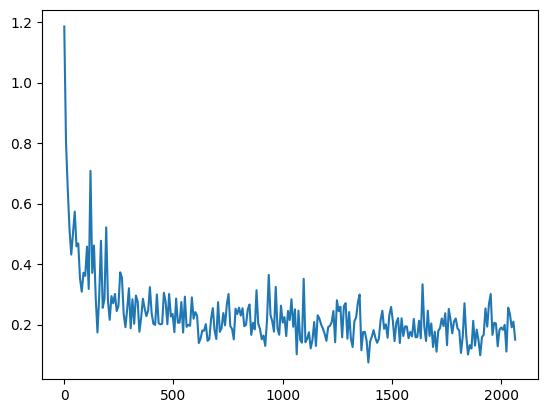

In [14]:
results[results['validation_loss'].notnull()]['validation_loss'].plot()

<Axes: >

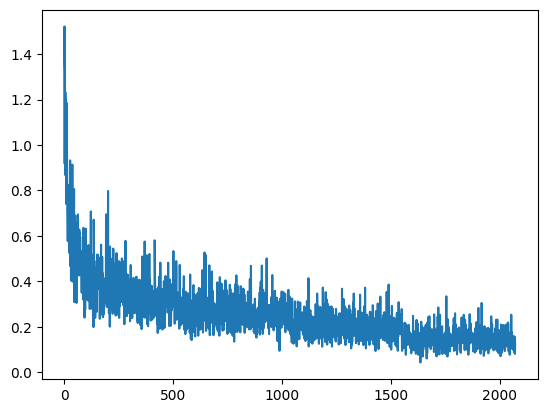

In [15]:
results[results['training_loss'].notnull()]['training_loss'].plot()

<Axes: >

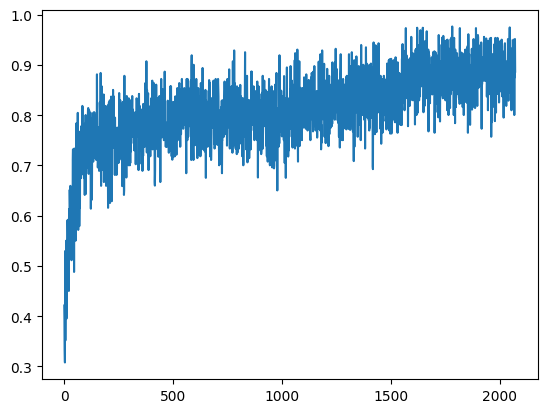

In [16]:
results[results['training_token_accuracy'].notnull()]['training_token_accuracy'].plot()

<Axes: >

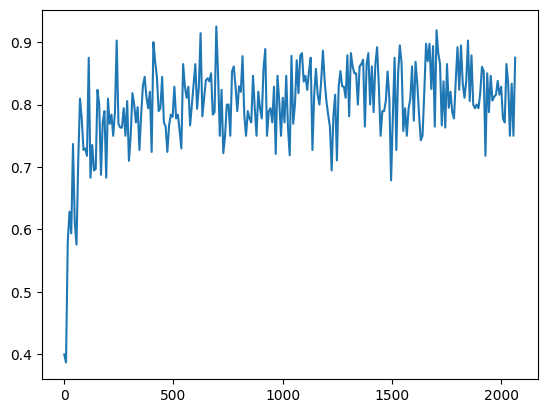

In [17]:
results[results['validation_token_accuracy'].notnull()]['validation_token_accuracy'].plot()